In [12]:
from PIL import Image
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt

# Warnings
import warnings;
warnings.simplefilter('ignore')

In [13]:
ROOT_PATH = os.path.abspath(os.path.join('../'+os.path.dirname('__file__')))

##### Tenemos una matriz M que representa una imagen en escala de grises, donde cada fila representa a una persona y cada columna representa un pixel. Donde n será el número de personas.

# Punto 11

# Captura de imagenes y agrupar en matriz

In [38]:
# Lista para almacenar las matrices de las imágenes
matrices = []
persona = []

tamaño = (255, 255)
# Iterar sobre los archivos en el directorio
for archivo in os.listdir(ROOT_PATH +"/data/images/input/raw/"):
    # Comprobar si el archivo es una imagen
    if archivo.endswith(".jpg") or archivo.endswith(".png"):
        # Cargar la imagen
        imagen = Image.open(os.path.join(ROOT_PATH +"/data/images/input/raw/", archivo))
        # Escala de grises
        imagen = imagen.convert('L')
        # Redimensionar la imagen
        imagen = imagen.resize(tamaño)
        # Guardar la imagen redimensionada
        imagen.save(ROOT_PATH +"/data/images/input/gold/" + archivo)
        # Convertir la imagen en una matriz NumPy y agregarla a la lista
        matriz = np.asarray(imagen).reshape((-1,))
        matrices.append(matriz)
        persona.append(archivo.split(".")[0])
        
# Convertir la matriz en un dataframe de pandas
# df_imagenes = pd.DataFrame(matrices)
df_imagenes = matrices

##### Primero, necesitamos calcular la distancia de cada persona a todas las demás personas en la imagen, utilizando las cuatro normas matriciales: 1, 2, ∞ y Frobenius. Para esto, podemos utilizar la función scipy.spatial.distance_matrix, que calcula la matriz de distancias entre todas las filas de una matriz.

In [15]:
import numpy as np
from scipy.spatial import distance_matrix

# Calcular la matriz de distancias con las cuatro normas matriciales
D1 = distance_matrix(df_imagenes, df_imagenes, p=1)
D2 = distance_matrix(df_imagenes, df_imagenes, p=2)
Dinf = distance_matrix(df_imagenes, df_imagenes, p=np.inf)
DFro = distance_matrix(df_imagenes, df_imagenes, p=np.linalg.norm(df_imagenes, 'fro'))  # https://www.youtube.com/watch?v=9IGaV_3HnGg&ab_channel=JohnOrtizOrdo%C3%B1ez

##### Ahora, necesitamos calcular el indicador de lejanía de cada persona. Esto se puede hacer calculando el promedio de las distancias de cada persona a todas las demás personas.

In [16]:
# Calcular el indicador de lejanía de cada persona
I1 = np.mean(D1, axis=1)
I2 = np.mean(D2, axis=1)
Iinf = np.mean(Dinf, axis=1)
IFro = np.mean(DFro, axis=1)

##### Finalmente, podemos encontrar la mediana de la imagen, es decir, la persona más típica, encontrando el índice del valor mínimo del indicador de lejanía para cada una de las normas matriciales.

In [17]:
# Encontrar la mediana de la imagen para cada una de las normas matriciales
mediana_1 = np.argmin(I1)
mediana_2 = np.argmin(I2)
mediana_inf = np.argmin(Iinf)
mediana_Fro = np.argmin(IFro)

print("La mediana de la imagen (usando norma 1) es la persona número:", mediana_1)
print("La mediana de la imagen (usando norma 2) es la persona número:", mediana_2)
print("La mediana de la imagen (usando norma infinito) es la persona número:", mediana_inf)
print("La mediana de la imagen (usando norma Frobenius) es la persona número:", mediana_Fro)

La mediana de la imagen (usando norma 1) es la persona número: 1
La mediana de la imagen (usando norma 2) es la persona número: 1
La mediana de la imagen (usando norma infinito) es la persona número: 4
La mediana de la imagen (usando norma Frobenius) es la persona número: 0


# Punto 12

In [40]:
amd_1 = np.array(Image.open(os.path.join(ROOT_PATH +"/data/images/input/silver/amd1.jpg")).convert("L").resize(tamaño)).reshape((-1,))
amd_2 = np.array(Image.open(os.path.join(ROOT_PATH +"/data/images/input/silver/amd2.jpg")).convert("L").resize(tamaño)).reshape((-1,))

matrices.append(amd_1)
matrices.append(amd_2)
persona.append('amd_1')
persona.append('amd_2')

In [20]:
# Calcular distancias
distances_l1 = []
distances_l2 = []
distances_linf = []
distances_frobenius = []

for i in range(len(matrices)):
    dist_l1 = 0
    dist_l2 = 0
    dist_linf = 0
    dist_frobenius = 0
    for j in range(len(matrices)):
        dist_l1 += np.sum(np.abs(matrices[i] - matrices[j]))
        dist_l2 += np.sqrt(np.sum((matrices[i] - matrices[j])**2))
        dist_linf = max(dist_linf, np.max(np.abs(matrices[i] - matrices[j])))
        dist_frobenius += np.sqrt(np.sum((matrices[i] - matrices[j])**2))
    distances_l1.append(dist_l1)
    distances_l2.append(dist_l2)
    distances_linf.append(dist_linf)
    distances_frobenius.append(dist_frobenius)

# Encontrar la mediana para cada norma matricial
median_l1 = np.argmin(distances_l1)
median_l2 = np.argmin(distances_l2)
median_linf = np.argmin(distances_linf)
median_frobenius = np.argmin(distances_frobenius)

print("Mediana para L1:", median_l1)
print("Mediana para L2:", median_l2)
print("Mediana para Linf:", median_linf)
print("Mediana para Frobenius:", median_frobenius)

# Construir vecindad con centro en mi imagen y un radio de 5
my_distances = []
for i in range(len(matrices)):
    dist = np.sqrt(np.sum((matrices[i] - amd_1)**2))
    my_distances.append(dist)

nearest_indices = np.argsort(my_distances)[:5]

# Mostrar imágenes
amd_1_resized = Image.fromarray(amd_1).resize(tamaño)
amd_2_resized = Image.fromarray(amd_2).resize(tamaño)
img3_resized = Image.fromarray(matrices[nearest_indices[1]]).resize(tamaño)

amd_1_resized.show()
amd_2_resized.show()
img3_resized.show()

Mediana para L1: 1
Mediana para L2: 0
Mediana para Linf: 0
Mediana para Frobenius: 0


In [34]:
# # Mostrar imágenes
# amd_1_resized = Image.fromarray(amd_1).resize(tamaño)
# amd_2_resized = Image.fromarray(amd_2).resize(tamaño)
# img3_resized = Image.fromarray(matrices[nearest_indices[1]]).resize(tamaño)

# amd_1_resized.show()
# amd_2_resized.show()
# img3_resized.show()

Tu imagen pertenece al grupo:  1


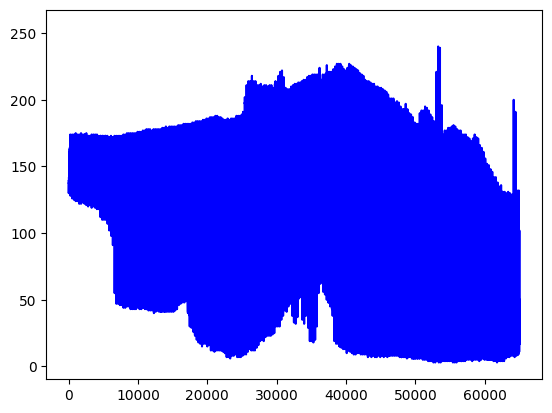

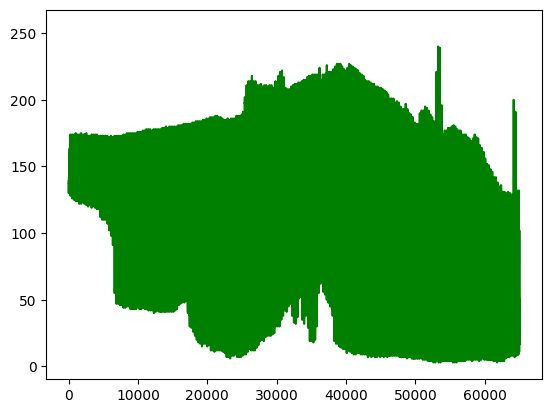

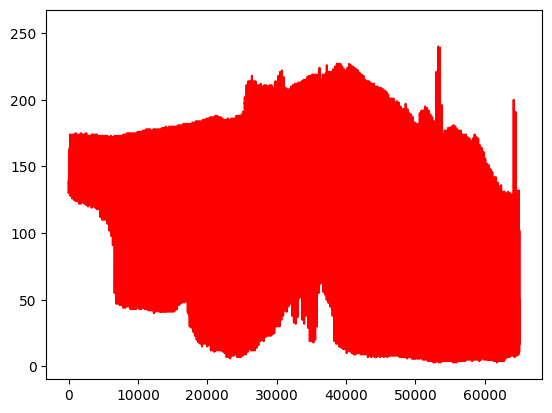

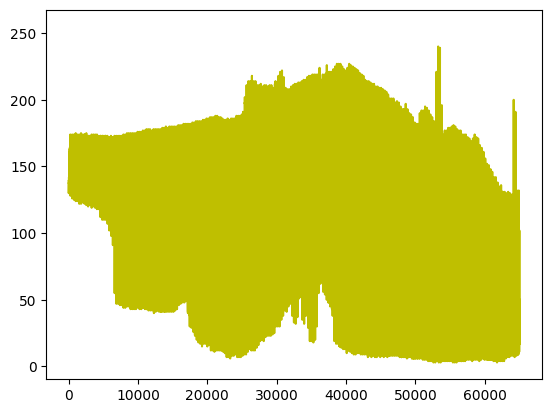

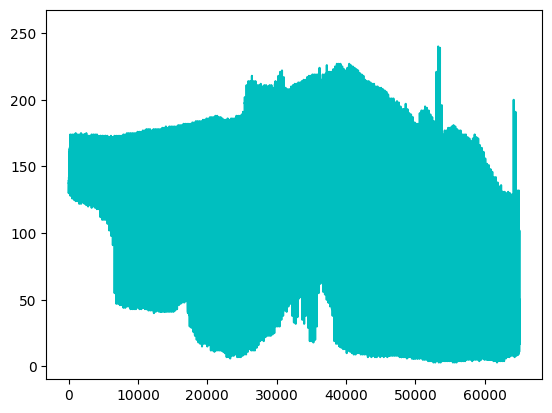

In [87]:
# # TODO
# # Cluster
# x = matrices
# y = np.array(Image.open(os.path.join(ROOT_PATH +"/data/images/input/silver/amd1.jpg")).convert("L").resize(tamaño)).flatten()
# y = pd.DataFrame(y).T.values
# from sklearn.cluster import KMeans
# kmeans = KMeans(n_clusters=4)
# kmeans.fit(x)
# label = kmeans.predict(y)
# print("Tu imagen pertenece al grupo: ", label[0])

# colors = ['b', 'g', 'r', 'y', 'c']
# for i in range(5):
#     plt.plot(x[kmeans.labels_ == str(i)].T, color = colors[i])
#     plt.plot(y, color= 'k', linewidth=5)
#     plt.show()